# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\miche\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NewsAPI")
type(api_key)

str

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en")
#Bitcoin_headlines

In [5]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")
#Ethereum_headlines

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        date = article["publishedAt"][:10]
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        date = article["publishedAt"][:10]
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000


In [8]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.005725,0.058500,0.055650,0.885850
std,0.470121,0.058633,0.088168,0.102371
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.350450,0.000000,0.000000,0.836000
50%,0.000000,0.056000,0.000000,0.910500
75%,0.315000,0.092500,0.082000,0.954250
max,0.726400,0.178000,0.287000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.244345,0.073250,0.01345,0.91330
std,0.344475,0.079278,0.02766,0.08322
min,-0.340000,0.000000,0.00000,0.78200
25%,0.000000,0.000000,0.00000,0.84050
50%,0.125000,0.037500,0.00000,0.92650
75%,0.557175,0.151750,0.00000,1.00000
max,0.771700,0.194000,0.07200,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has a mean positive score of 0.073250, which is higher than Bitcoin. This means that the general public has a relatively more positive view on average against Ethereum. 

Q: Which coin had the highest compound score?

A: Ethereum has a higher compound of 0.771700 when compared to Bitcoin of 0.726400. This means that the general public has a relatively more positive view overall against Ethereum. 

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.194000 when compared to Bitcoin of 0.178000.This means that the general public at its best has a more positive view against Ethereum. 

Overall people's view against Ethereum is relatively positive when compared to Bitcoin. 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [12]:
# Create a list of stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# Expand the default stopwords list if necessary
stop.append(",")
stop.append(".")
stop.append("!")
stop.append("/")

In [14]:
#set stop 
stop=set(stop)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words=word_tokenize(text)
   
    # Convert the words to lowercase
    words=list(filter(lambda w:w.lower(),words))
    
    # remove punctuations
    words=list(filter(lambda t:t not in punctuation, words))
   
    # Remove the stop words
    words=list(filter(lambda t:t.lower() not in stop,words))
    
    # Lemmatize words into root words
    tokens=[lemmatizer.lemmatize(word) for word in words]
            
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"]=Bitcoin_df.text.apply(tokenizer)
Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[Like, Dogecoin, devotee, mayor, Reno, leader,..."
2,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[Filed, supply, chain, attack, reached, thousa..."
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, TechCrunchs, biggest, important..."
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."


In [17]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"]=Ethereum_df.text.apply(tokenizer)
Ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[Blockchain, infrastructure, startup, heating,..."
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
3,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[Cent, founded, 2017, ad-free, creator, networ..."
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[Representation, Ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
N=2
grams=ngrams(tokenizer(Bitcoin_df.text.str.cat()),N)
Counter(grams).most_common(20)

[(('illustration', 'taken'), 5),
 (('Reuters', 'Bitcoin'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'front'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('2021', 'REUTERS/Dado'), 3),
 (('Bitcoin', 'Ethereum'), 2),
 (('representation', 'virtual'), 2),
 (('front', 'stock'), 2),
 (('stock', 'graph'), 2),
 (('graph', 'illustration'), 2),
 (('taken', 'November'), 2),
 (('November', '19'), 2),
 (('19', '2020'), 2),
 (('2020', 'REUTERS/Dado'), 2),
 (('21', 'Reuters'), 2),
 (('char', 'Reuters'), 2),
 (('Reuters', 'Staff'), 2)]

In [20]:
# Generate the Ethereum N-grams where N=2
N=2
grams=ngrams(tokenizer(Ethereum_df.text.str.cat()),N)
Counter(grams).most_common(20)

[(('Bitcoin', 'Ethereum'), 3),
 (('PC', 'motherboard'), 3),
 (('cryptocurrency', 'ethereum'), 3),
 (('so-called', '“'), 2),
 (('REUTERS/Dado', 'Ruvic/IllustrationNEW'), 2),
 (('Ruvic/IllustrationNEW', 'YORK'), 2),
 (('Aug', '5'), 2),
 (('5', 'Reuters'), 2),
 (('char', 'Representations'), 2),
 (('cryptocurrencies', 'Bitcoin'), 2),
 (('Ethereum', 'placed'), 2),
 (('placed', 'PC'), 2),
 (('motherboard', 'illustration'), 2),
 (('illustration', 'taken'), 2),
 (('taken', 'June'), 2),
 (('June', '29'), 2),
 (('29', '2021'), 2),
 (('2021', 'REUTERS/Dado'), 2),
 (('Reuters', 'Ethereum'), 2),
 (('char', 'Ether'), 2)]

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [40]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens_bitcoin=tokenizer(Bitcoin_df.text.str.cat())
token_count(all_tokens_bitcoin,10)

[('char', 19),
 ('Reuters', 7),
 ('attack', 6),
 ('REUTERS/Dado', 6),
 ('July', 5),
 ('2021', 5),
 ('Bitcoin', 5),
 ('bitcoin', 5),
 ('illustration', 5),
 ('taken', 5)]

In [41]:
# Use token_count to get the top 10 words for Ethereum
all_tokens_Ethereum=tokenizer(Ethereum_df.text.str.cat())
token_count(all_tokens_Ethereum,10)

[('char', 20),
 ('Ethereum', 13),
 ('2021', 6),
 ('network', 6),
 ('cryptocurrency', 5),
 ('blockchain', 4),
 ('like', 4),
 ('Reuters', 4),
 ('Ether', 4),
 ('ethereum', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [25]:
# Process text for wordcloud creation
def worldcloud(text,title=""):
    df_cloud=WordCloud (width=300).generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    frontdict={"fonrsize":28}
    plt.title(title)
    plt.show()

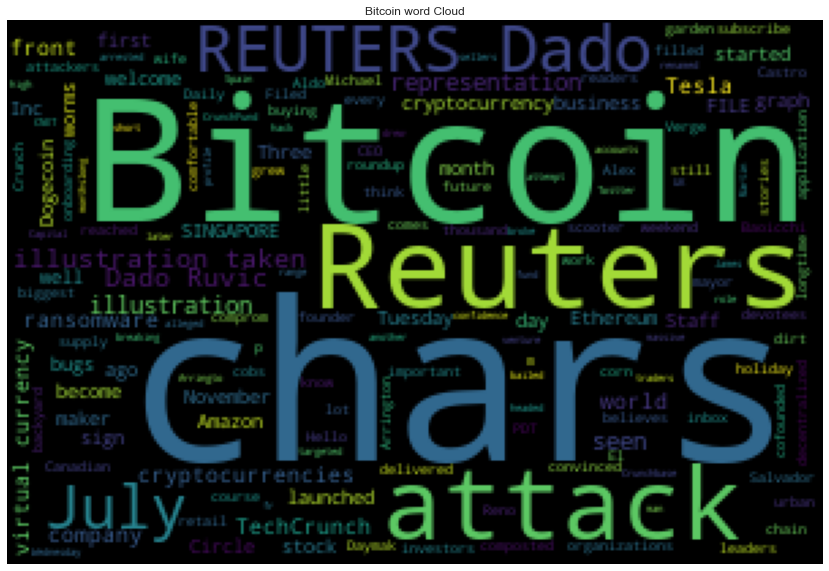

In [26]:
# Generate wordcloud
worldcloud(Bitcoin_df.text.str.cat(),title="Bitcoin word Cloud")

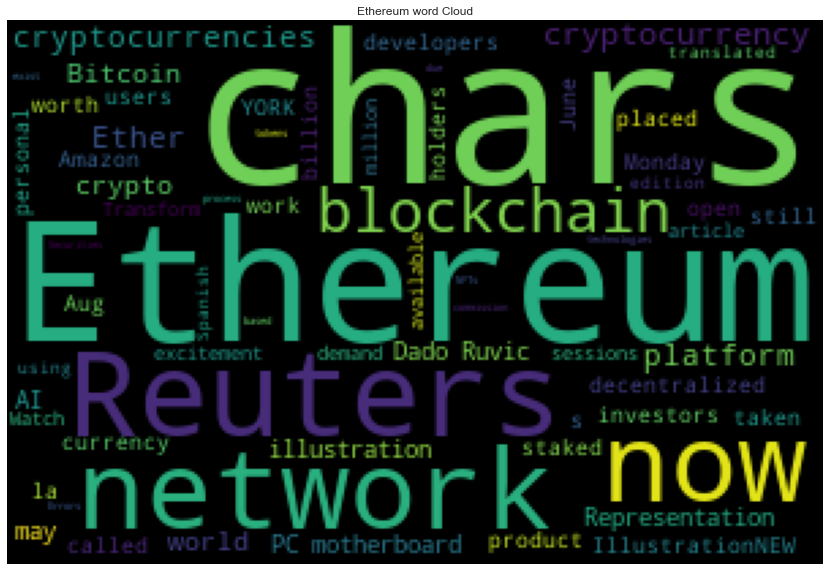

In [42]:
# Generate the Ethereum word cloud
worldcloud(Ethereum_df.text.str.cat(),title="Ethereum word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
all_btc=Bitcoin_df.text.str.cat()
all_btc

"When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Filed under:\r\nThe supply chain attack has reached over a thousand organizations.\r\nIllustration by Alex Castro / The Verge\r\nThree days after ransomware attackers started the holiday weekend by comprom… [+3376 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application w

In [32]:
# Run the NER processor on all of the text
doc=nlp(all_btc)

# Add a title to the document
doc.user_data["title"]="Bitcoin NER"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
for ent in doc.ents:
    print(ent.text,ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
The Verge ORG
Three days DATE
the holiday weekend DATE
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
chars]James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuters ORG
Tesla Inc ORG
2020

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
all_eth=Ethereum_df.text.str.cat()
all_eth

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/

In [36]:
# Run the NER processor on all of the text
doc=nlp(all_eth)

# Add a title to the document
doc.user_data["title"]="Ethereum NER"

In [37]:
# Render the visualization
displacy.render(doc, style='ent')

In [38]:
# List all Entities
for ent in doc.ents:
    print(ent.text,ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Photothek PERSON
more than $13 billion MONEY
2.0 CARDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DAT

---